In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
wine_df = pd.read_csv("wine.csv")

# Display the first few rows of the dataset
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


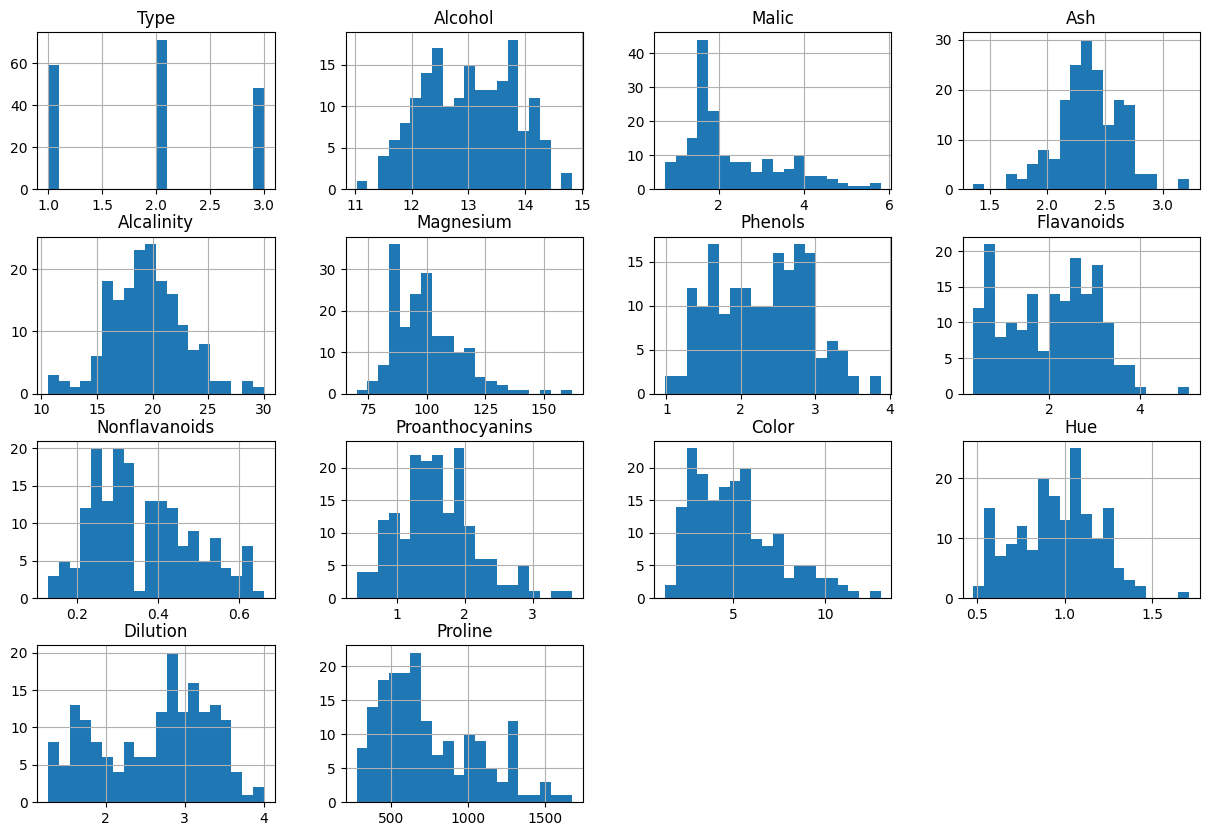

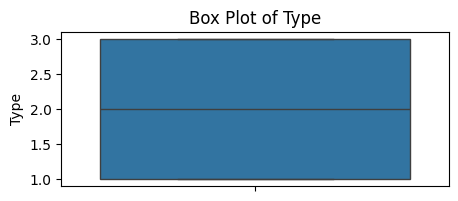

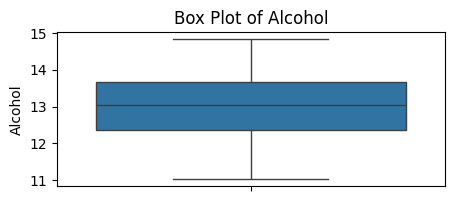

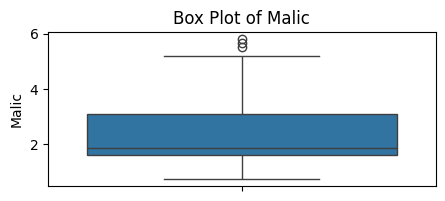

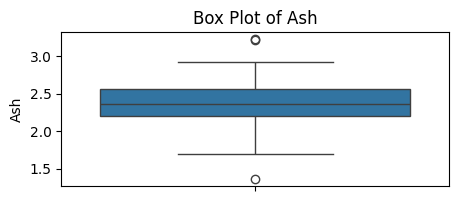

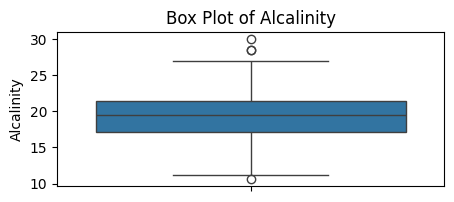

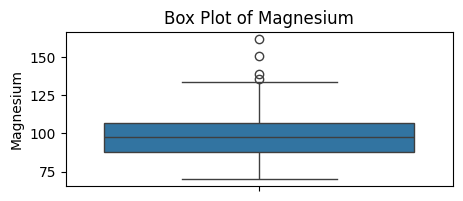

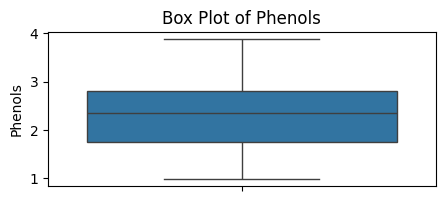

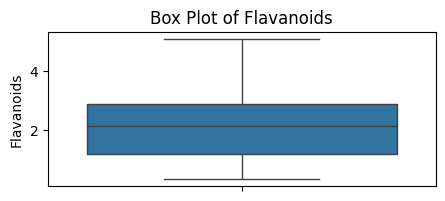

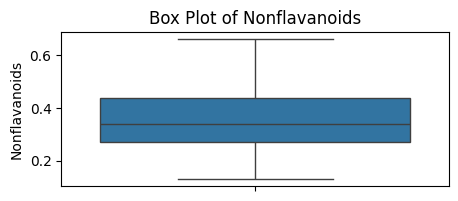

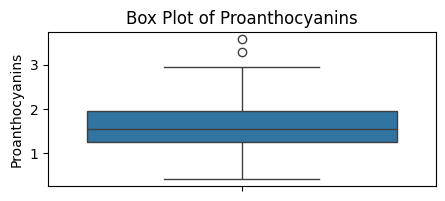

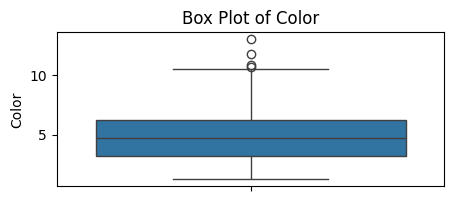

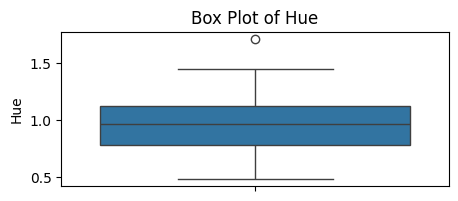

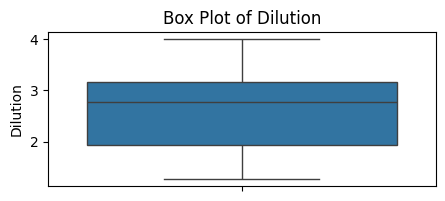

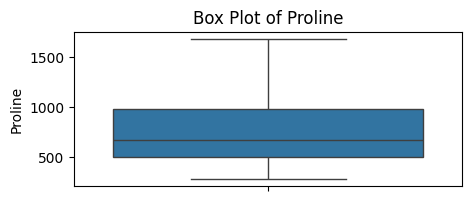

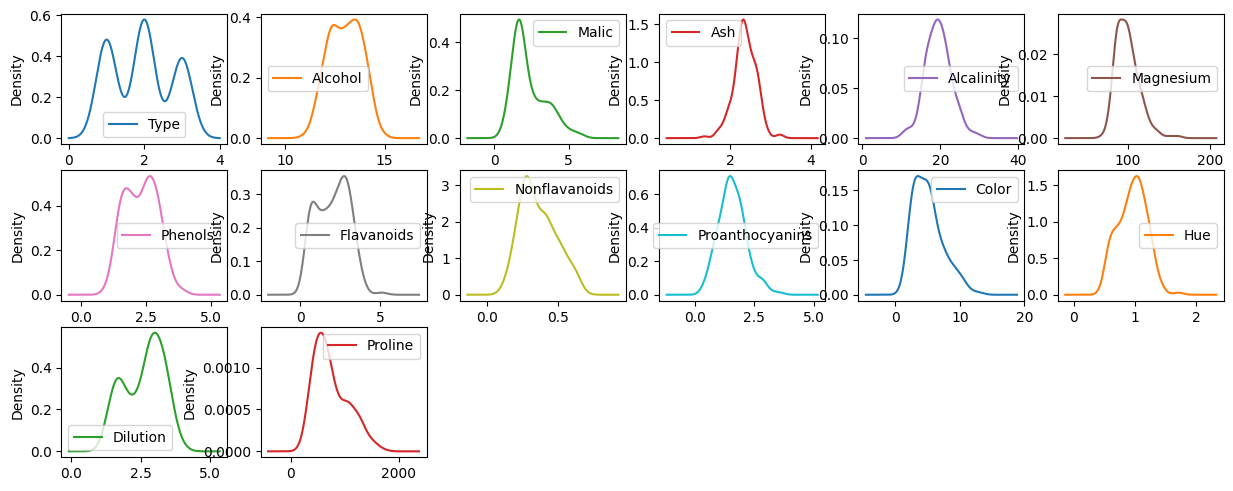

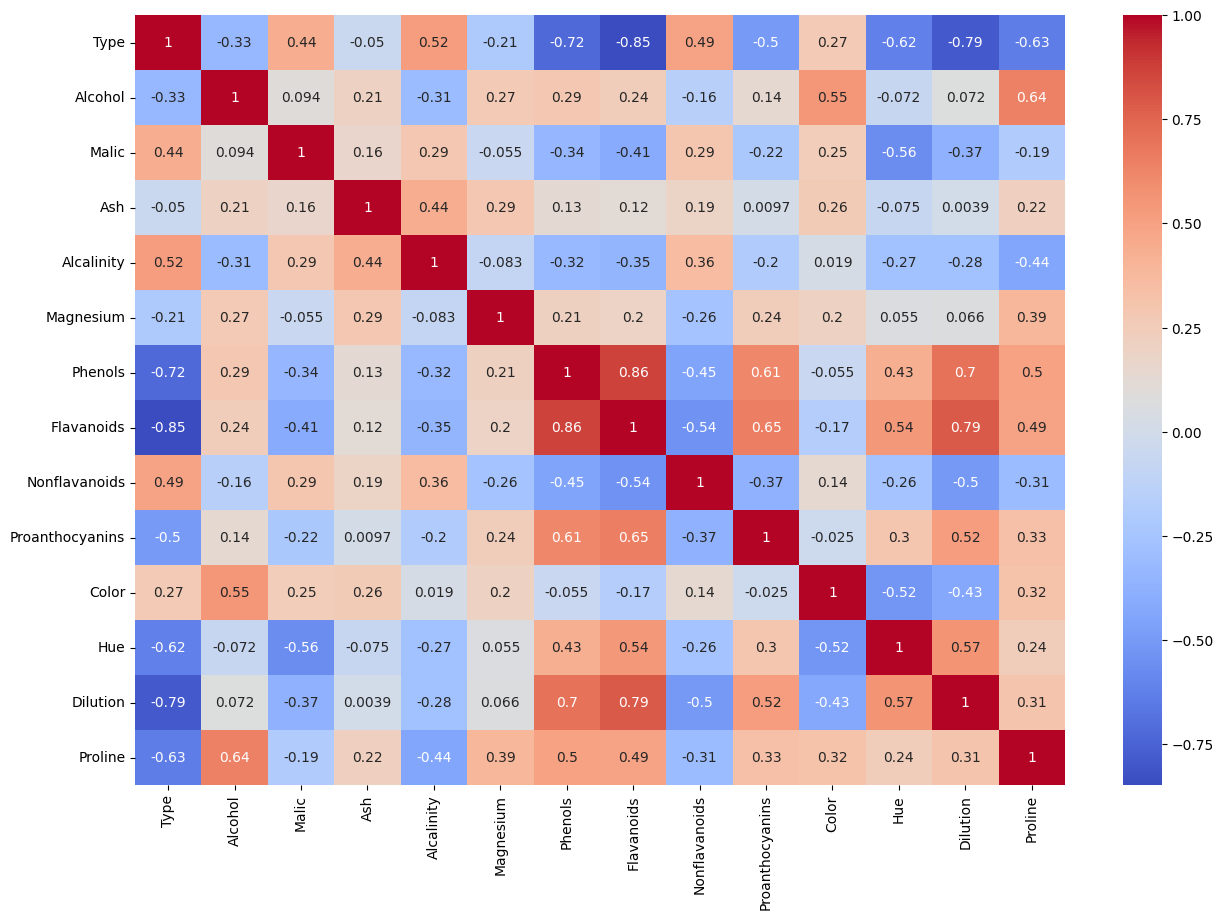

In [2]:
# Visualize the distribution of features using histograms
wine_df.hist(bins=20, figsize=(15, 10))
plt.show()

# Visualize the distribution of features using box plots
for column in wine_df.columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(data=wine_df[column]) # type: ignore
    plt.title(f'Box Plot of {column}')
    plt.show()

# Visualize the distribution of features using density plots
wine_df.plot(kind='density', subplots=True, layout=(10, 6), sharex=False, figsize=(15, 20))
plt.show()

# Investigate correlations between features
plt.figure(figsize=(15, 10))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.show()


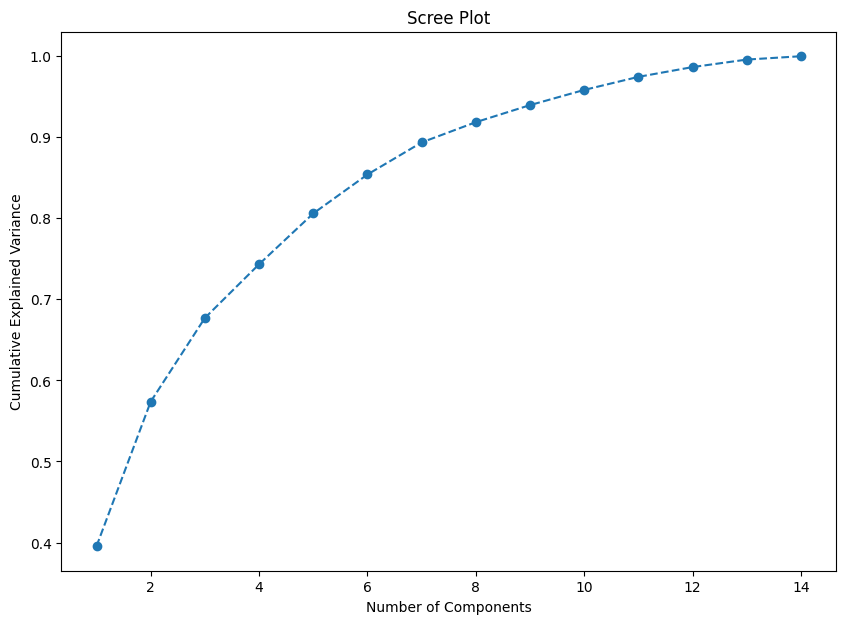

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

# Apply PCA
pca = PCA()
wine_pca = pca.fit_transform(wine_scaled)

# Determine the optimal number of principal components using scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


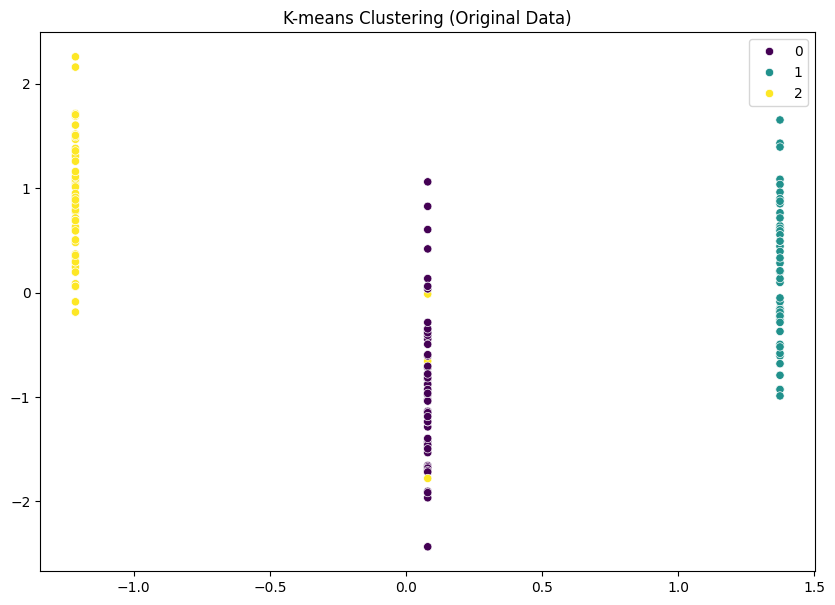

(0.3064839832483345, 1.315707552261773)

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-means clustering to the original dataset
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(wine_scaled)
labels_original = kmeans_original.labels_

# Visualize clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=wine_scaled[:, 0], y=wine_scaled[:, 1], hue=labels_original, palette='viridis')
plt.title('K-means Clustering (Original Data)')
plt.show()

# Evaluate clustering performance
silhouette_original = silhouette_score(wine_scaled, labels_original)
db_original = davies_bouldin_score(wine_scaled, labels_original)
silhouette_original, db_original


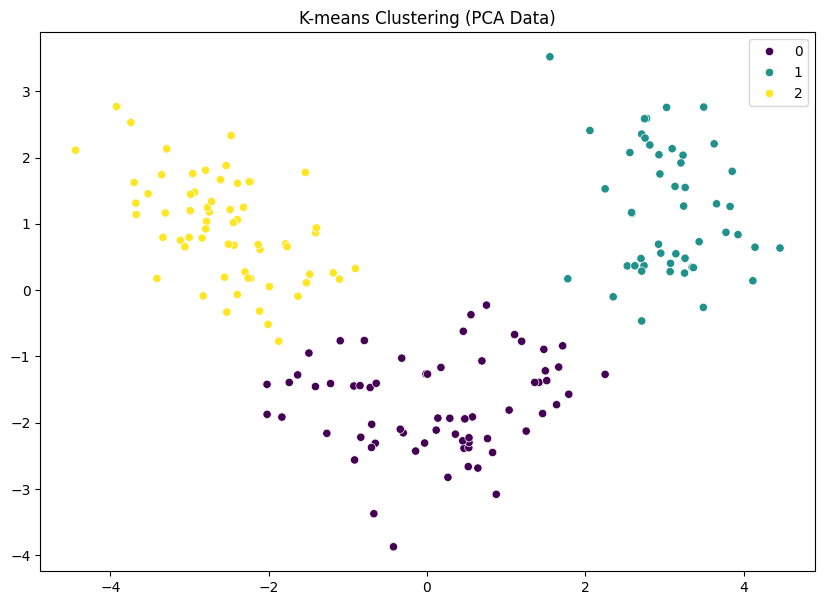

(0.6024415520362845, 0.5397078562575709)

In [5]:
# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(wine_pca[:, :2])  # Using the first two principal components
labels_pca = kmeans_pca.labels_

# Visualize clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=labels_pca, palette='viridis')
plt.title('K-means Clustering (PCA Data)')
plt.show()

# Evaluate clustering performance
silhouette_pca = silhouette_score(wine_pca[:, :2], labels_pca)
db_pca = davies_bouldin_score(wine_pca[:, :2], labels_pca)
silhouette_pca, db_pca


In [6]:
comparison = {
    "Silhouette Score Original": silhouette_original,
    "Davies-Bouldin Index Original": db_original,
    "Silhouette Score PCA": silhouette_pca,
    "Davies-Bouldin Index PCA": db_pca
}
comparison


{'Silhouette Score Original': 0.3064839832483345,
 'Davies-Bouldin Index Original': 1.315707552261773,
 'Silhouette Score PCA': 0.6024415520362845,
 'Davies-Bouldin Index PCA': 0.5397078562575709}

# Conclusion :-
The key findings from the analysis include:
1. The original dataset had a certain level of correlation among features, which was visualized using the heatmap.
2. PCA effectively reduced the dimensionality of the dataset, and the first few principal components explained a significant amount of variance.
3. Clustering performance was evaluated using silhouette score and Davies–Bouldin index for both the original and PCA-transformed data.
4. The PCA-transformed data showed different clustering results compared to the original data, with varying performance metrics.

Practical Implications:
- PCA can simplify the dataset by reducing dimensions, which may lead to faster computation and easier visualization.
- Clustering on PCA-transformed data may result in different groupings compared to the original data, which can be beneficial or detrimental depending on the context.

Recommendations:
- Use PCA when dealing with high-dimensional data to reduce complexity and improve computational efficiency.
- Evaluate clustering performance on both original and PCA-transformed data to choose the best approach for the specific dataset.

